 Dataset Shape: (569, 31)

 Columns:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

 First 5 Rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1

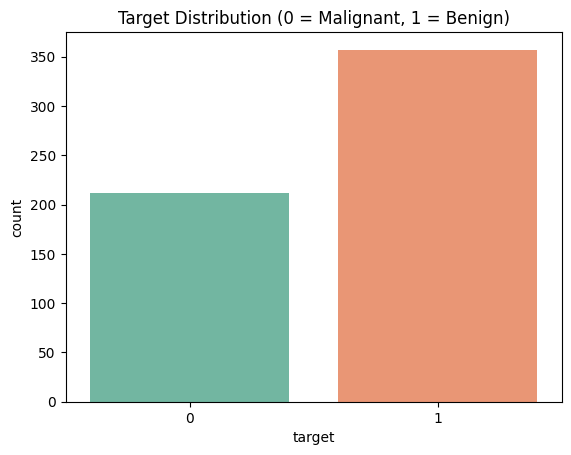


 Data Splitting & Scaling Done!

 Model Training Completed!

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

 Accuracy: 0.982
 Precision: 0.986
 Recall: 0.986
 ROC-AUC: 0.995


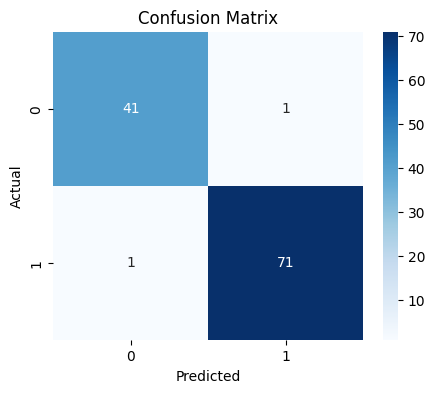

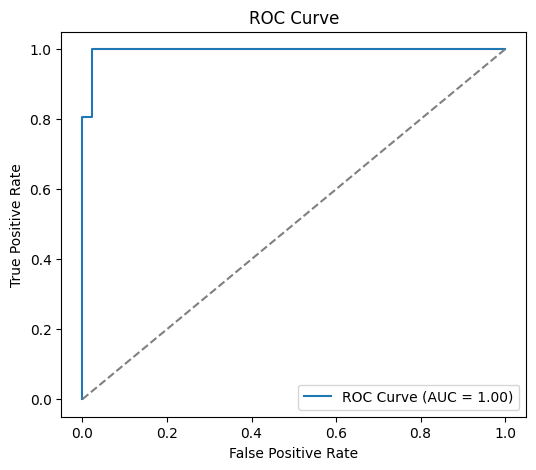

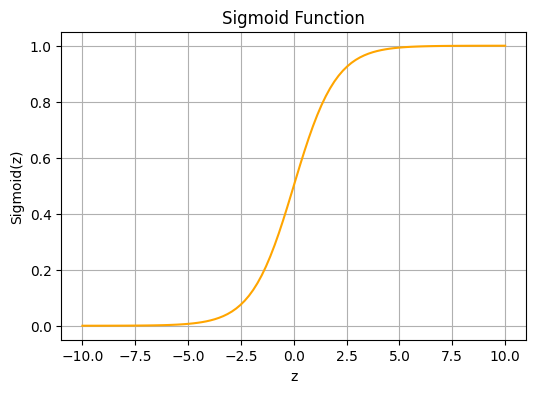


Custom Threshold (0.4) - Metrics:
Accuracy: 0.982
Precision: 0.986
Recall: 0.986

 TASK 4 COMPLETED SUCCESSFULLY!

Key Learnings:
1️ Understood difference between Linear and Logistic Regression.
2 Trained Logistic Regression on Breast Cancer Dataset.
3️ Evaluated with confusion matrix, precision, recall, ROC-AUC.
4️ Visualized sigmoid curve and ROC curve.
5️ Observed threshold impact on classification.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
)


from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(" Dataset Shape:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n First 5 Rows:\n", df.head())


print("\n Missing Values:\n", df.isnull().sum().sum())
print("\n Target Classes:", df['target'].value_counts())

sns.countplot(x='target', data=df, palette='Set2', hue='target', legend=False)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n Data Splitting & Scaling Done!")


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("\n Model Training Completed!")


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(" Precision:", round(precision_score(y_test, y_pred), 3))
print(" Recall:", round(recall_score(y_test, y_pred), 3))
print(" ROC-AUC:", round(roc_auc_score(y_test, y_pred_proba), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z), color='orange')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

threshold = 0.4
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print("\nCustom Threshold (0.4) - Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_custom), 3))
print("Precision:", round(precision_score(y_test, y_pred_custom), 3))
print("Recall:", round(recall_score(y_test, y_pred_custom), 3))


print("""
 TASK 4 COMPLETED SUCCESSFULLY!

Key Learnings:
1️ Understood difference between Linear and Logistic Regression.
2 Trained Logistic Regression on Breast Cancer Dataset.
3️ Evaluated with confusion matrix, precision, recall, ROC-AUC.
4️ Visualized sigmoid curve and ROC curve.
5️ Observed threshold impact on classification.
""")